# Méthode de Gradient

In [1]:
import numpy as np
import matplotlib.pyplot as plt


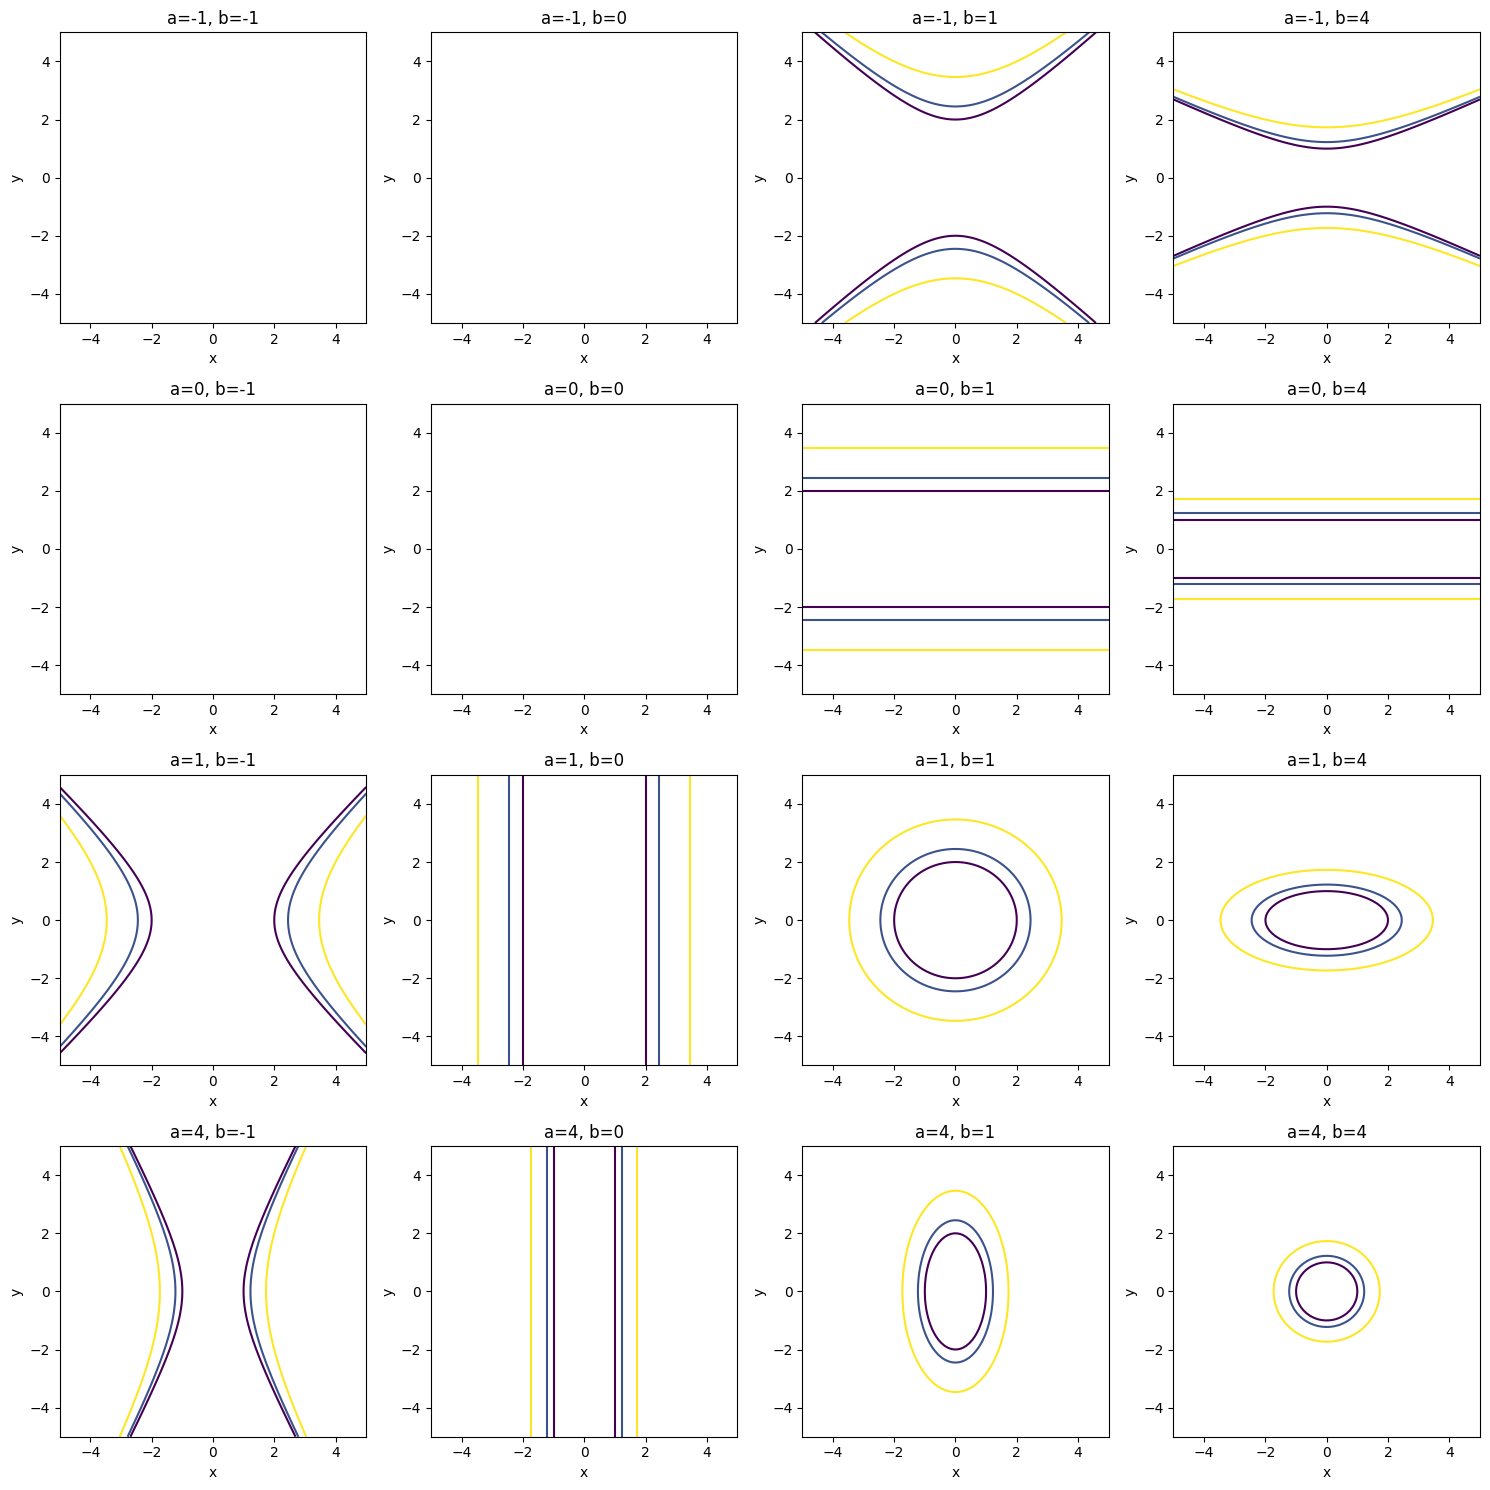

In [2]:
#Exercice 3.1

def J(x,y,a,b) :
    return (1/2)*a*x**2 + (1/2)*b*y**2

def tracer_ligne_niveau(fonction, x, y, liste_a, liste_b, niveaux):
    X, Y = np.meshgrid(x, y)
    fig, ax = plt.subplots(len(liste_a), len(liste_b), figsize=(15, 15))
    
    for i, a in enumerate(liste_a):
        for j, b in enumerate(liste_b):
            Z = fonction(X, Y, a, b)
            ax[i, j].contour(X, Y, Z, levels=niveaux)
            ax[i, j].set_title(f'a={a}, b={b}')
            ax[i, j].set_xlabel('x')
            ax[i, j].set_ylabel('y')
    
    plt.tight_layout()
    plt.show()

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

liste_a = [-1, 0, 1, 4]
liste_b = [-1, 0, 1, 4]
niveaux = [2, 3, 6]

tracer_ligne_niveau(J, x, y, liste_a, liste_b, niveaux)

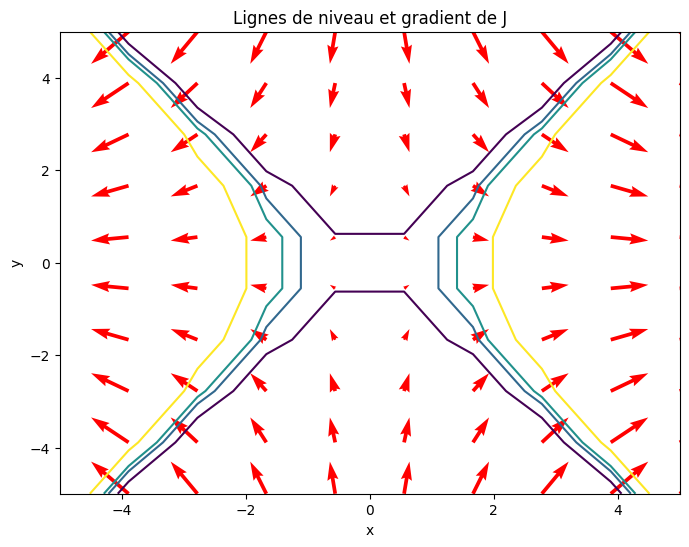

In [3]:
#exerice 3.1
# Question2 : le gradient est (ax, by)

a = 3
b = -2
(x0, y0) = (2, 1)

def J_fixe(x,y,a,b) :
    return (a/2)*x**2 + (b/2)*y**2

def gradient_J(x, y, a, b):
    return a*x, b*y

def tra_ligne_niveau(fonction, x, y, a, b, niveaux):
    X, Y = np.meshgrid(x, y)
    Z = fonction(X, Y, a, b)
    plt.contour(X, Y, Z, levels=niveaux)
    plt.xlabel('x')
    plt.ylabel('y')

def tracer_gradient(x0, y0, a, b):
    X, Y = np.meshgrid(x, y)
    grad_x, grad_y = gradient_J(X, Y, a, b)
    plt.quiver(X, Y, grad_x, grad_y, color='r')

x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
niveaux = [0, 2, 3, 6]

# Tracer les lignes de niveau et le gradient
plt.figure(figsize=(8, 6))
tra_ligne_niveau(J_fixe, x, y, a, b, niveaux)
tracer_gradient(x0, y0, a, b)
plt.title('Lignes de niveau et gradient de J')
plt.show()

## 3.1 Méthode de gradient à pas fixe

### Exercice 3.2

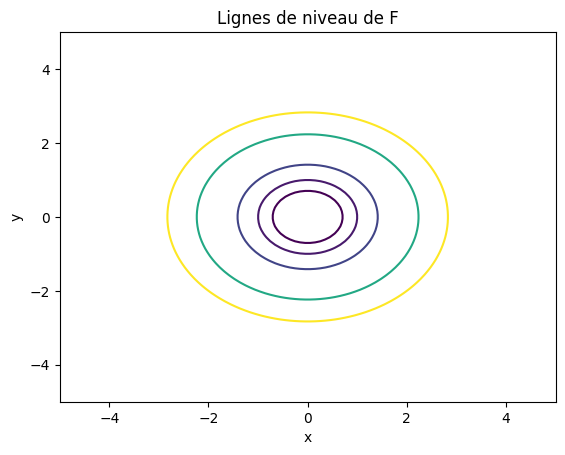

In [14]:
def F(x,y):
    return x**2 + y**2
# F est 2-convexe
def tracer_ligne_niveau(fonction, x, y, niveaux):
    X, Y = np.meshgrid(x, y)
    Z = fonction(X, Y)
    plt.contour(X, Y, Z, levels=niveaux)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Lignes de niveau de F')
    plt.show()

niveaux = [0.5, 1, 2, 5, 8]
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

tracer_ligne_niveau(F, x, y, niveaux)




Montrer que f est alpha convexe et que son gradient est Lipschitz

alpha = 2 et L = 2

La méthode converge si 0 < rho < alpha/L = 2/2 = 1 

In [7]:
def gf(GradF, v0, rho, tol, NitMax):
    '''GradF est une fonction qui calcule le gradient de F au point v “ px, yq
    v0 le point initial
    rho le pas fixe choisi
    tol la tolérance demandée qui servira pour le critère d’arrêt
    NitMax le nombre maximal d’itérations autorisé
    '''
    vk = v0
    conv = False
    Nit = 0
    suite_vk = [vk]
    vmin = vk
    while Nit < NitMax:
        grad = GradF(vk[0], vk[1])
        vk = vk - rho * grad
        Nit += 1
        suite_vk.append(vk)
        if F(vk[0], vk[1]) < F(vmin[0], vmin[1]):
            vmin = vk
        if np.linalg.norm(grad) < tol:
            conv = True
            break
    return vmin, suite_vk, Nit, conv


def GradF(x, y):
    return np.array([2*x, 2*y])

In [16]:
liste_rho= [0.1, 0.5, 0.9]
tol = 1e-6
v0 = np.array([6, 1])
for rho in liste_rho:
    vmin, suite_vk, Nit, conv = gf(GradF, v0, rho, tol, 1000)
    x = vmin[0]
    y = vmin[1]
    print(f'Pour rho={rho}, vmin={vmin}, F(vmin) = {F(x,y)}, Nit={Nit}, conv={conv}')

Pour rho=0.1, vmin=[3.23519360e-07 5.39198933e-08], F(vmin) = 1.0757213119575002e-13, Nit=75, conv=True
Pour rho=0.5, vmin=[0. 0.], F(vmin) = 0.0, Nit=2, conv=True
Pour rho=0.9, vmin=[-3.23519360e-07 -5.39198933e-08], F(vmin) = 1.075721311957512e-13, Nit=75, conv=True


### Exercice 3.3

In [66]:
def F(x,y) :
    return x**2 + 100*(y**2)

def GradF(x,y) :
    return np.array([2*x, 200*y])

rho = 1.9999/1000
v0 = np.array([1, 1]) 
NitMax = 10000
vmin, suite_vk, Nit, conv = gf(GradF, v0, rho, tol, NitMax)
print(f'Pour rho={rho}, vmin={vmin}, F(vmin) = {F(vmin[0],vmin[1])}, Nit={Nit}, conv={conv}')
vmin1 = vmin

Pour rho=0.0019999, vmin=[4.96180437e-007 4.94065646e-324], F(vmin) = 2.461950257557717e-13, Nit=3622, conv=True


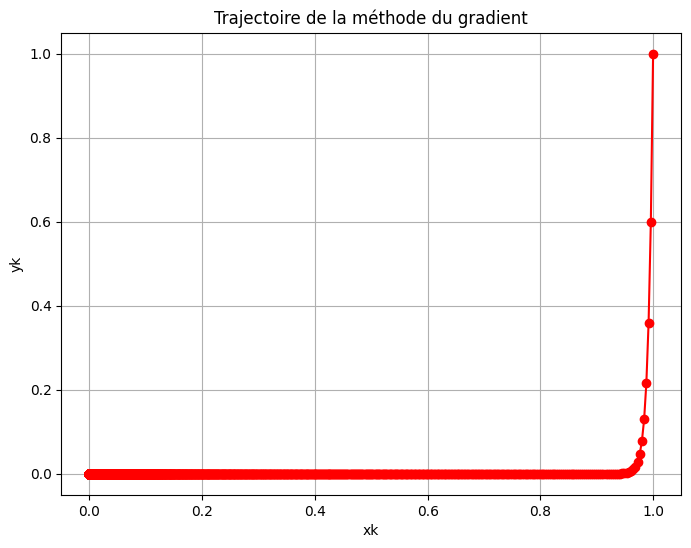

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(*zip(*suite_vk), marker='o', c='r')
plt.xlabel('xk')
plt.ylabel('yk')
plt.title('Trajectoire de la méthode du gradient')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Evolution de F(xk, yk) au cours des itérations')

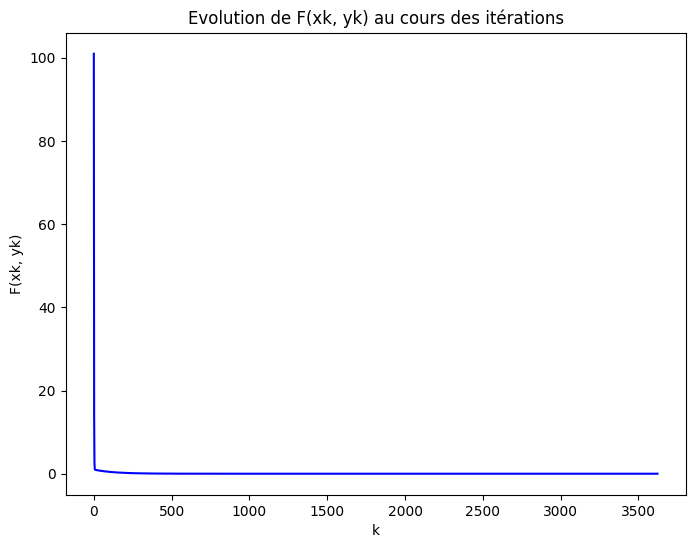

In [63]:
# Afficher sur un deuxième graphique la fonction k --> F(xk, yk)
plt.figure(figsize=(8, 6))
plt.plot([F(x, y) for x, y in suite_vk], c='b')
plt.xlabel('k')
plt.ylabel('F(xk, yk)')
plt.title('Evolution de F(xk, yk) au cours des itérations')

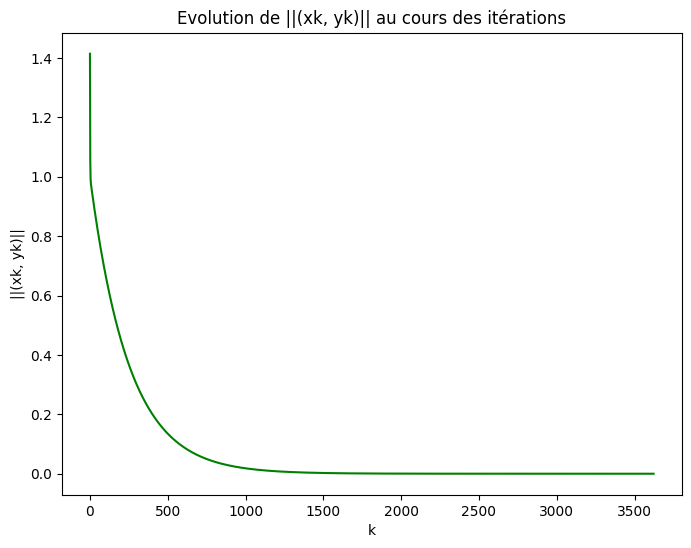

In [64]:
# Afficher sur un troisième graphique la fonction k --> ||(xk, yk)||
plt.figure(figsize=(8, 6))
plt.plot([np.linalg.norm(v) for v in suite_vk], c='g')
plt.xlabel('k')
plt.ylabel('||(xk, yk)||')
plt.title('Evolution de ||(xk, yk)|| au cours des itérations')
plt.show()

In [68]:
def gf2(GradF, v0, rho, tol, Nitmax):
    vk = v0
    conv = False
    Nit = 0
    suite_vk = [vk]
    vmin = vk
    while Nit < Nitmax:
        grad = GradF(vk[0], vk[1])
        vk = vk - rho * grad
        Nit += 1
        suite_vk.append(vk)
        if F(vk[0], vk[1]) < F(vmin[0], vmin[1]):
            vmin = vk
        if np.linalg.norm(rho * grad) < tol: # si ||vk+1 - vk|| < tol
            conv = True
            break
    return vmin, suite_vk, Nit, conv

vmin, suite_vk, Nit, conv = gf2(GradF, v0, rho, tol, NitMax)
print(f'Pour rho={rho}, vmin={vmin}, F(vmin) = {F(vmin[0],vmin[1])}, Nit={Nit}, conv={conv}')

print(f'Avec gf, F(vmin) = {F(vmin1[0], vmin1[1])} et pour gf2 , F(vmin) = {F(vmin[0], vmin[1])}')

Pour rho=0.0019999, vmin=[2.48468011e-004 4.94065646e-324], F(vmin) = 6.173635226720404e-08, Nit=2071, conv=True
Avec gf, F(vmin) = 2.461950257557717e-13 et pour gf2 , F(vmin) = 6.173635226720404e-08


Ca converge plus vite avec gf2

### Exercice 3.4

In [77]:
def f(A,x):
    return np.linalg.norm(A@x)

def grad_f(A,x):
    return A.T@A@x / np.linalg.norm(A@x)

def Gradient(f, gradf, A, x0, rho, tol, Nitmax):
    n = len(x0)
    xk = x0
    conv = False
    Nit = 0
    #suite_xk = [xk]
    Sol = xk
    while Nit < NitMax:
        grad = gradf(A, xk)
        xk = xk - rho * grad
        Nit += 1
        #suite_xk.append(xk)
        
        if f(A, xk) < f(A, Sol):
            Sol = xk
        if np.linalg.norm(grad) < tol:
            conv = True
            break
    return Sol, Nit, conv

In [84]:
#Initialisation
A = np.array([[1, 2], [2, 1]])
x0 = np.array([1, 1])
rho = 0.4
tol = 1e-6
NitMax = 10000
Sol, Nit, Conv = Gradient(f, grad_f, A, x0, rho, tol, NitMax)
print(f'Pour rho={rho}, Xmin={Sol}, f(Sol) = {f(A, Sol)}, Nit={Nit}, conv={Conv}')

Pour rho=0.4, Xmin=[0.15147186 0.15147186], f(Sol) = 0.6426406871192838, Nit=10000, conv=False
